#Part A: Undirected Graph

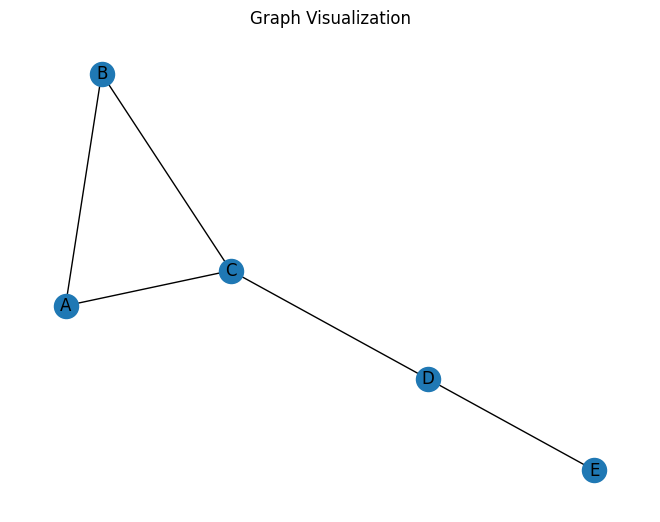

Node Degrees:
A: 2
B: 2
C: 3
D: 2
E: 1

Average Degree: 2.00

Degree Distribution:
Degree | Number of Nodes
------------------------
  1    |        1       
  2    |        3       
  3    |        1       


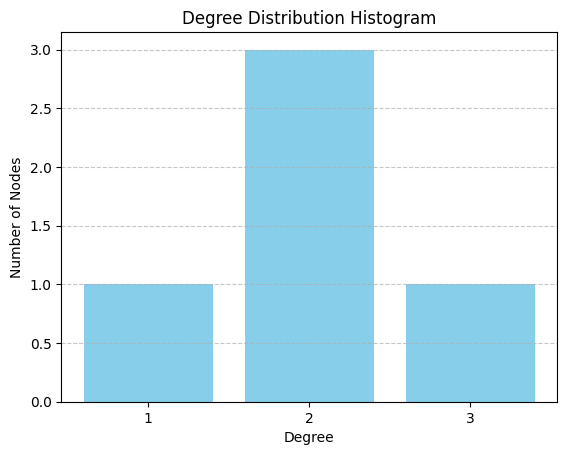

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an undirected graph
G = nx.Graph()

# Add edges
edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('D', 'E')]
G.add_edges_from(edges)

# Draw the graph
nx.draw(G, with_labels=True)
plt.title("Graph Visualization")
plt.show()

# Print each node's degree
degrees = dict(G.degree())
print("Node Degrees:")
for node, degree in degrees.items():
    print(f"{node}: {degree}")

# Calculate and print the average degree
avg_degree = sum(degrees.values()) / G.number_of_nodes()
print(f"\nAverage Degree: {avg_degree:.2f}")

# Calculate degree distribution
degree_distribution = {k: list(degrees.values()).count(k) for k in set(degrees.values())}

# Print degree distribution table
print("\nDegree Distribution:")
print("Degree | Number of Nodes")
print("------------------------")
for degree, count in sorted(degree_distribution.items()):
    print(f"{degree:^6} | {count:^15}")

# Plot degree distribution histogram
plt.bar(degree_distribution.keys(), degree_distribution.values(), color='skyblue')
plt.xlabel("Degree")
plt.ylabel("Number of Nodes")
plt.title("Degree Distribution Histogram")
plt.xticks(list(degree_distribution.keys()))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


#Part B: Directed Graph

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Directed graph
DG = nx.DiGraph()
directed_edges = [('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D'), ('E', 'D')]
DG.add_edges_from(directed_edges)

# In-degree and Out-degree
in_degrees = dict(DG.in_degree())
out_degrees = dict(DG.out_degree())

# Create DataFrame
degree_table = pd.DataFrame({
    'Node': list(DG.nodes()),
    'In-Degree': [in_degrees[node] for node in DG.nodes()],
    'Out-Degree': [out_degrees[node] for node in DG.nodes()]
})
print("Table of In-Degree and Out-Degree:")
print(degree_table)


Table of In-Degree and Out-Degree:
  Node  In-Degree  Out-Degree
0    A          0           2
1    B          1           1
2    C          2           1
3    D          2           0
4    E          0           1


In [6]:
avg_in = sum(in_degrees.values()) / DG.number_of_nodes()
avg_out = sum(out_degrees.values()) / DG.number_of_nodes()

print(f"\nAverage In-Degree: {avg_in}")
print(f"Average Out-Degree: {avg_out}")



Average In-Degree: 1.0
Average Out-Degree: 1.0


In [7]:
# Degree distributions
in_degree_distribution = pd.Series(list(in_degrees.values())).value_counts().sort_index()
out_degree_distribution = pd.Series(list(out_degrees.values())).value_counts().sort_index()

in_degree_dist_table = pd.DataFrame({
    'In-Degree': in_degree_distribution.index,
    'Frequency': in_degree_distribution.values
})

out_degree_dist_table = pd.DataFrame({
    'Out-Degree': out_degree_distribution.index,
    'Frequency': out_degree_distribution.values
})

print("\nIn-Degree Distribution:")
print(in_degree_dist_table)

print("\nOut-Degree Distribution:")
print(out_degree_dist_table)



In-Degree Distribution:
   In-Degree  Frequency
0          0          2
1          1          1
2          2          2

Out-Degree Distribution:
   Out-Degree  Frequency
0           0          1
1           1          3
2           2          1


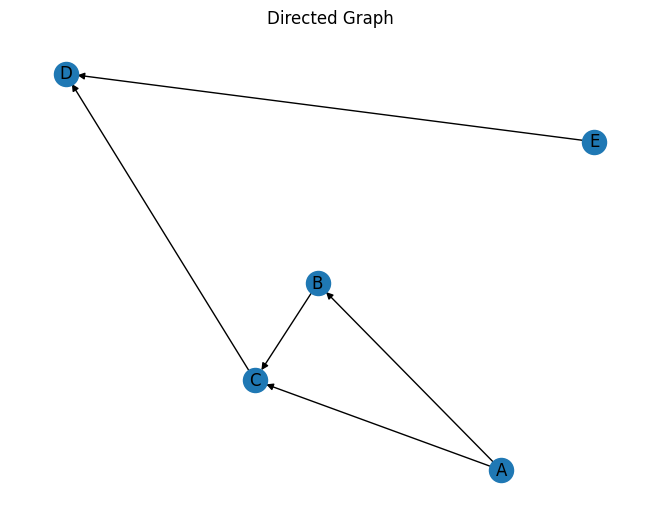

In [8]:
nx.draw(DG, with_labels=True, arrows=True)
plt.title("Directed Graph")
plt.show()


#Part C: Weighted Graph

Table of Degrees:
      Weighted Degree  Unweighted Degree
Node                                    
A                   5                  2
B                   3                  2
C                   8                  3
D                   9                  2
E                   5                  1

Average Weighted Degree: 6.00

Comment on Differences Between Unweighted and Weighted Degree:
Unweighted degree counts the number of connections a node has.
Weighted degree accounts for the strength (weight) of each connection.
For example, node D has only 2 connections but a high weighted degree of 9 due to strong edge weights.


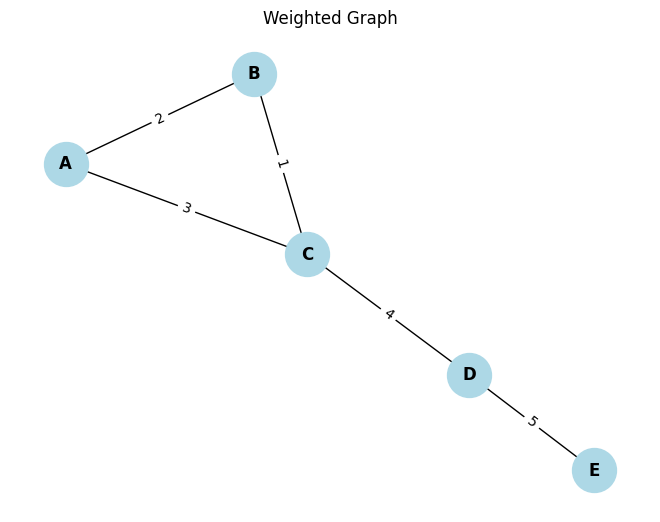

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Create the weighted graph
WG = nx.Graph()
weighted_edges = [('A', 'B', 2), ('A', 'C', 3), ('B', 'C', 1), ('C', 'D', 4), ('D', 'E', 5)]
WG.add_weighted_edges_from(weighted_edges)

# Calculate weighted and unweighted degrees
weighted_degree = dict(WG.degree(weight='weight'))
unweighted_degree = dict(WG.degree())

# Create table using pandas
degree_df = pd.DataFrame({
    'Node': list(WG.nodes),
    'Weighted Degree': [weighted_degree[node] for node in WG.nodes],
    'Unweighted Degree': [unweighted_degree[node] for node in WG.nodes]
})
degree_df.set_index('Node', inplace=True)

# Calculate average weighted degree
avg_weighted_deg = sum(weighted_degree.values()) / WG.number_of_nodes()

# Display the table
print("Table of Degrees:")
print(degree_df)
print(f"\nAverage Weighted Degree: {avg_weighted_deg:.2f}")

# Comment
print("\nComment on Differences Between Unweighted and Weighted Degree:")
print("Unweighted degree counts the number of connections a node has.")
print("Weighted degree accounts for the strength (weight) of each connection.")
print("For example, node D has only 2 connections but a high weighted degree of 9 due to strong edge weights.")

# Draw the graph
pos = nx.spring_layout(WG)
nx.draw(WG, pos, with_labels=True, node_color='lightblue', node_size=1000, font_weight='bold')
labels = nx.get_edge_attributes(WG, 'weight')
nx.draw_networkx_edge_labels(WG, pos, edge_labels=labels)
plt.title("Weighted Graph")
plt.show()
